### 問題：我是一個好奇的人，想再判斷薪水是否跟年資相關
- [資料集](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer)

# Environment

In [45]:

import os

datasetName="Salary Data.csv"
datasetName = datasetName.replace(" ", "%20")
if not os.path.isfile(datasetName):
  os.system("wget https://raw.githubusercontent.com/StanOWO/1131_NTUAI_ML_Resource/main/dataset/" + datasetName)

# Preprocessing

## Import & Load Data Set

In [46]:
import pandas as pd

dataset = pd.read_csv("Salary Data.csv")

## Decomposition the dataset into Independent & Dependent Variables

In [47]:
#X = pd.DataFrame(dataset.iloc[:, 0].values,columns=['age'])
X = pd.DataFrame(dataset.iloc[:, -2].values)
Y = pd.DataFrame(dataset.iloc[:, -1].values)

## Missing Data

In [48]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

X = pd.DataFrame(imputer.fit_transform(X))
Y = pd.DataFrame(imputer.fit_transform(Y))

## Split Training & Testing set

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Model(Linear regression)

In [50]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
Y_pred=regressor.fit(X_train, Y_train).predict(X_test)

# Performance

In [51]:
R_Score = regressor.score(X_test, Y_test)

print("R-Squared Score:",R_Score)

R-Squared Score: 0.6487906281556153


# Visualize

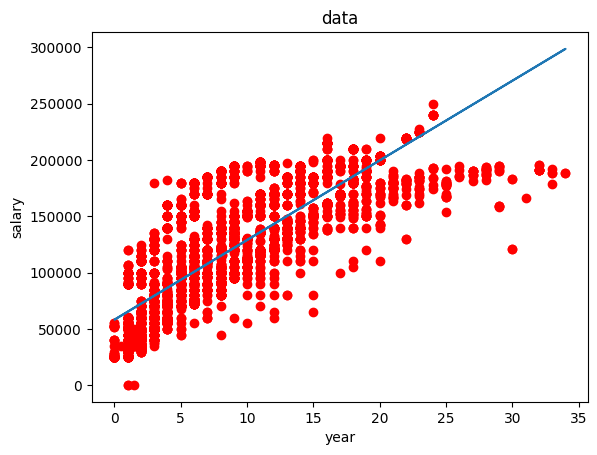

In [52]:
import matplotlib.pyplot as plt

plt.plot(X_train, regressor.predict(X_train), linestyle='-')
plt.scatter(X_train, Y_train, color='red')
plt.title('data')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()